## CIFAR10 딥러닝 모델
### 데이터 로드 및 전처리
* CIFAR10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리
* 데이터셋은 keras.datasets에서 불러올 수 있는 CIFAR10 데이터 셋을 활용
* 데이터셋 분리 작업에서는 sklearn 라이브러리의 train_test_split 함수를 활용
* 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from tensorflow.keras.datasets import cifar10

In [2]:
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.2,
                                                  random_state=123)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


* CIFAR10 데이터셋에서 사용되는 총 개의 클래스 이름을 class_names 변수로 지정
* class 이름은  'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

* 데이터 중 샘플 하나를 시각화해보고, 데이터의 형태를 확인
* 

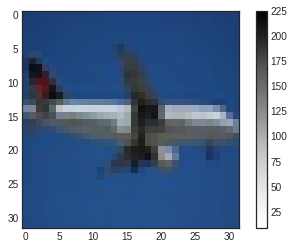

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

* 데이터의 형태를 변형하여 모델이 잘 학습할 수 있게끔 해줌
* reshape()을 할 때, 훈련 데이터는 (40000, 3072), 검증 데이터는 (10000, 3072), 테스트 데이터는 (10000, 3072)로 지정해도 되지만, 32*32로만 지정하고 나머지는 -1로 지정하여 자동으로 모양을 맞추도록 함

In [5]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형
x_train = x_train.reshape(-1, 32 * 32 * 3)
x_val = x_val.reshape(-1, 32 * 32 * 3)
x_test = x_test.reshape(-1, 32 * 32 * 3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


* 학습 데이터가 0부터 255까지의 숫자로 구성되어 있기 때문에 데이터셋을 255.0으로 나눠 0 ~ 255 숫자 범위를 0 ~ 1의 범위로 줄임

In [6]:
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

### 모델 구성 및 컴파일
* BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 10개의 이미지를 분류하는 딥러닝 모델을 구성
* 첫번째 입력 레이어 Input 으로는 전처리에서 바꾼 모양대로 3072개의 형태
* 두 번째 레이어는 유닛수 512개와 sigmoid 활성화 함수를 가지는 Dense 레이어를 추가
* 그리고 마지막은 분류 갯수인 10으로 유닛수를 지정하고, softmax 활성화 함수를 사용하는 Dense 레이어를 추가
* 모델에 사용할 옵티마이저는 SGD를 사용하고, 손실 함수는 다중 분류에 레이블이 정수로 인코딩 되어 있으므로 sparse_categorical_crossentropy를 지정하며, 지표는 accuracy를 사용

In [7]:
model = models.Sequential()
model.add(layers.Input(shape=(3072, )))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, name='hidden'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('sigmoid')) 
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 3072)              12288     
_________________________________________________________________
activation (Activation)      (None, 3072)              0         
_________________________________________________________________
dropout (Dropout)            (None, 3072)              0         
_________________________________________________________________
hidden (Dense)               (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

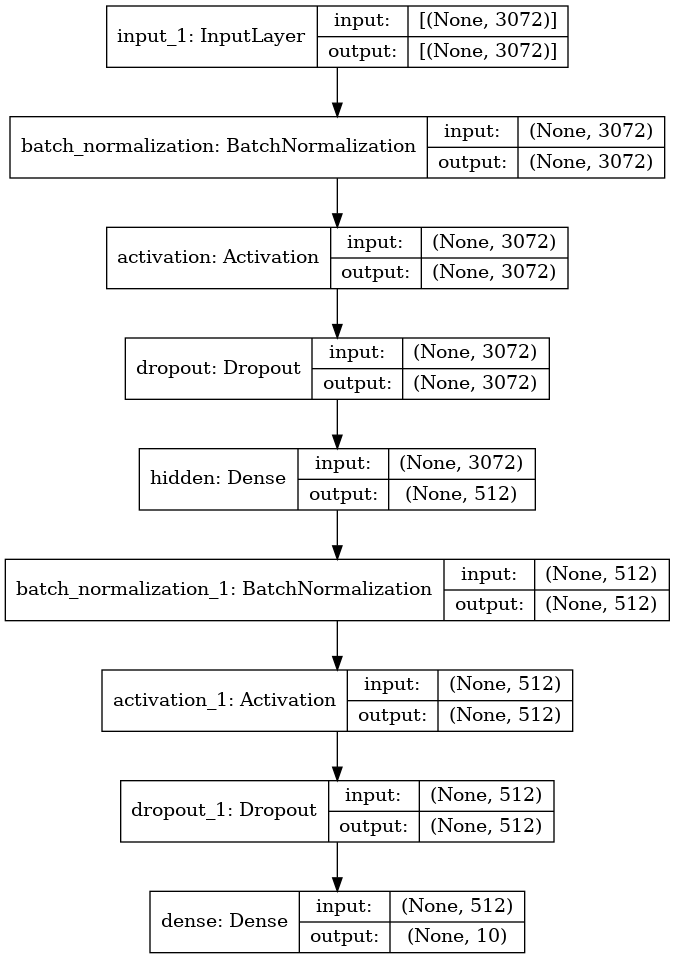

In [8]:
utils.plot_model(model, show_shapes=True)

### 모델 학습
* ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행

#### ModelCheckpoint
* tf.keras.callbacks.ModelCheckpoint: 정기적으로 모델의 체크포인트를 저장하고, 문제가 발생할 때 복구하는데 사용

#### EarlyStopping
* tf.keras.callbacks.EarlyStopping: 검증 성능이 한동안 개선되지 않을 경우 학습을 중단할 때 사용
###### 일정 patience 동안 검증 세트에 대한 점수가 오르지 않으면 학습을 정지
###### 모델이 향상되지 않으면 학습이 자동으로 중지되므로, epochs 숫자를 크게 해도 무방
###### 학습이 끝난 후의 최상의 가중치를 복원하기 때문에 모델을 따로 복원할 필요가 없음

In [9]:
check_point_cb = callbacks.ModelCheckpoint('reuter_model.h5', save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=3, monitor='val_loss',
                                  restore_best_weights=True)
history = model.fit(x_train, y_train,
                    epochs=80,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/80
79/79 [==============================] - 3s 14ms/step - loss: 2.2689 - accuracy: 0.1621 - val_loss: 2.1736 - val_accuracy: 0.2238
Epoch 2/80
79/79 [==============================] - 1s 7ms/step - loss: 2.1339 - accuracy: 0.2210 - val_loss: 2.0812 - val_accuracy: 0.2808
Epoch 3/80
79/79 [==============================] - 1s 7ms/step - loss: 2.0865 - accuracy: 0.2413 - val_loss: 2.0265 - val_accuracy: 0.2940
Epoch 4/80
79/79 [==============================] - 1s 7ms/step - loss: 2.0512 - accuracy: 0.2560 - val_loss: 1.9878 - val_accuracy: 0.3021
Epoch 5/80
79/79 [==============================] - 1s 7ms/step - loss: 2.0267 - accuracy: 0.2691 - val_loss: 1.9685 - val_accuracy: 0.3031
Epoch 6/80
79/79 [==============================] - 1s 7ms/step - loss: 2.0120 - accuracy: 0.2746 - val_loss: 1.9470 - val_accuracy: 0.3168
Epoch 7/80
79/79 [==============================] - 1s 7ms/step - loss: 1.9992 - accuracy: 0.2792 - val_loss: 1.9337 - val_accuracy: 0.3202
Epoch 8/80
79/79 [=

* 학습 히스토리의 loss, val_loss, accuracy, val_accuracy를 차트로 시각화

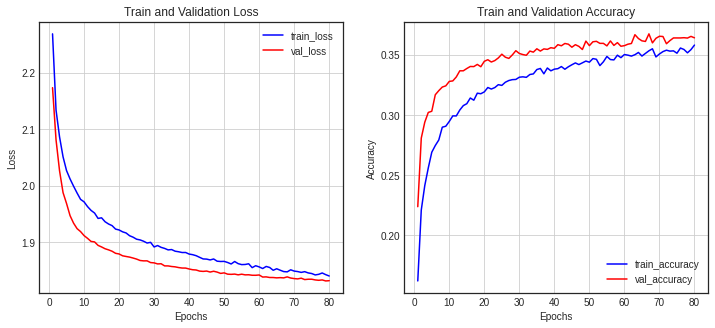

In [10]:
def show_history(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

# 정의한 show_history() 함수를 이용해 모델 학습 결과인 history를 시각화

show_history(history)

### 모델 평가 및 예측
* 테스트 데이터셋을 이용해 모델을 평가

In [11]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.8014 - accuracy: 0.3753


[1.8013513088226318, 0.37529999017715454]

### 회고
* accuracy가 매우 낮게 나왔음
* 노드에서 언급된 바와 같이 CNN을 활용해야 accuracy를 높일 수 있을 것